# Information on How These Data Are Organized:

`TypeOfResponse` refers to whether participants pressed a button ("APResp") or did not press a button ("APRespITI") within the given time frame.

`Version` refers to the task version. I never changed the JS code; I merely changed which face/house was labeled as S1_1, S1_2, S1_3, or S1_4 in respective task folders.

`LogCounter` gets added to whenever the JS records a new datapoint.

`TrialCounter` gets added to whenever a new trial has started. This is reset at the start of each block.

`MatrixCounter` gets added to throughout the task and is never reset. It is what I use to call Stimuli #s.

`RunCounter` refers to the run: 0 is run 1, 1 is run 2, 2 is run 3, and 3 is run 4.

`Valid` refers to the valid trial type. `Invalid` invalid trial type. This is in reference to the main manipulation of the S-S association phase, whereby particular faces and houses are more likely to precede particular scenes.

`StimPresented` refers to my matrix of possible trial types. For instance, 1 means stimulus 1 is associated with scene 1 (valid). 16 means stimulus 4 is associated with scene 3 (invalid).

`PressCorrect` refers to the button that participants should press on that trial. This is how I define accuracy (i.e., correct: when PressCorrect = actualkeyPressed).

`ResponseMatrix` refers to which key is pressed; this is a redundant variable and was used to make sure that each key had been required an equal number of times throughout the task.

`ActualKeyPressed` is what key subjects pressed.

`Accuracy` & `RT` self-explanatory.

`FeedbackType` refers to whether they got correct as fb, incorrect as fb, or the fb time-out.

`runStart` refers to the initiation of the countdown to begin the task.

`ImagePresent` refers to when the face/house was presented.

`StimTime` refers to when the scene was presented.

`RespOnset` refers to when a response was made.

`AccCount` is how I give subjects accurate fb of their performance at the end of each run (i.e., a counter that gets added to after each correct trial & is divided by trial #).

`Subject` self-explanatory.

Some other labels aren't coded in the JS: `StimType` is coding from my StimPresented variable which stimulus preceded the scene, and `StimRep` looks for direct repetitions in the StimPresented matrix (i.e., if 15 comes twice in a row). These were coded in Matlab and added to the CSV file.

---

### Here we'll just import Python specific packages and read in our data.

In [64]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pylab as plb
import math
from scipy import stats

%matplotlib notebook 

In [65]:
%cd C:\Users\cb383\Desktop\YearTwo\controlwork\SCP_R\data
dat = pd.read_csv('AllSubsSS.csv')

C:\Users\cb383\Desktop\YearTwo\controlwork\SCP_R\data


# Do Some Basic Cleaning

#### We are filtering and preparing the data for analysis.

FOR REACTION TIMES:

-Select only `TypeOfResponse` equal to `Resp` (`ITI Resp` is when subs didn't respond).

-Only take the RTs that are greater than 200ms and less than 750 ms.

-Only take the RTs on accurate trials.

-Only take trials where the stimulus didn't repeat.


FOR ACCURACY:

-All errors are errors

In [66]:
cdat = dat.query('(TypeOfResponse != "APRespITI") & (RT > 200) & (RT < 750) & (Accuracy != 0) & (StimRep != 1)').copy()
adat = dat.copy()

In [67]:
adat['TrialType'] = adat['Valid'].isin([1])
adat.loc[adat['Valid'].isin([1]), 'TrialType'] = 'Valid'
adat.loc[~adat['Valid'].isin([1]), 'TrialType'] = 'Invalid'

cdat['TrialType'] = cdat['Valid'].isin([1])
cdat.loc[cdat['Valid'].isin([1]), 'TrialType'] = 'Valid'
cdat.loc[~cdat['Valid'].isin([1]), 'TrialType'] = 'Invalid'

# Look at Mean Validity Effects

### A validity effect means being faster and more accurate to respond when a face/house (S1) image validly cues its paired scene (S2) associate than when the scene is invalidly cued. Here: do the means look as expected?

In [68]:
sub_RTmeans = cdat.groupby(['subject','TrialType'])['RT'].mean()
RTgrpmean = pd.Series.mean(sub_RTmeans,level=1)
RTgrpmean

TrialType
Invalid    532.676300
Valid      519.794093
Name: RT, dtype: float64

In [69]:
RTgrpstd = pd.Series.std(sub_RTmeans,level=1)
RTgrpstd

TrialType
Invalid    23.757620
Valid      33.940442
Name: RT, dtype: float64

In [70]:
n = math.sqrt(44)
RTstderror = RTgrpstd / n
RTstderror

TrialType
Invalid    3.581596
Valid      5.116714
Name: RT, dtype: float64

#### Judging by these initial numbers, there may be an RT validity effect. Is that true of Accuracy?

In [71]:
sub_ACCmeans = adat.groupby(['subject','TrialType'])['Accuracy'].mean()
ACCgrpmean = pd.Series.mean(sub_ACCmeans,level=1)
ACCgrpmean

TrialType
Invalid    0.868622
Valid      0.884606
Name: Accuracy, dtype: float64

In [72]:
ACCgrpstd = pd.Series.std(sub_ACCmeans,level=1)
ACCgrpstd

TrialType
Invalid    0.070077
Valid      0.065934
Name: Accuracy, dtype: float64

In [73]:
ACCstderror = ACCgrpstd / n
ACCstderror

TrialType
Invalid    0.010565
Valid      0.009940
Name: Accuracy, dtype: float64

# Creating Variables to Run Statistics

#### This is a Python set of analyses, where the data above are organized in what's called "long-form" and to run statistics, I need "wide-form" data. So I am creating a new "dataframe" with the RT and accuracy means for valid and invalid trials, for each subject.

In [74]:
RTanalysis = pd.DataFrame()
lists = [[] for list in range(0,5)]

for ID in range (1,55):
    sub = cdat[cdat.subject == ID]
    lists[0].append(ID)
    validRT_trials = sub[sub.TrialType == 'Valid'].RT.mean()
    invalidRT_trials = sub[sub.TrialType == 'Invalid'].RT.mean()
    lists[1].append(validRT_trials)
    lists[2].append(invalidRT_trials)
    
RTanalysis['SubjectID'] = lists[0]
RTanalysis['Valid'] = lists[1]
RTanalysis['Invalid'] = lists[2]

In [75]:
#repeat for accuracy

ACCanalysis = pd.DataFrame()
new_lists = [[] for list in range(0,5)]

for ID in range(1,55):
    sub = adat[adat.subject == ID]
    new_lists[0].append(ID)
    validACC_trials = sub[sub.TrialType == 'Valid'].Accuracy.mean()
    invalidACC_trials = sub[sub.TrialType == 'Invalid'].Accuracy.mean()
    new_lists[1].append(validACC_trials)
    new_lists[2].append(invalidACC_trials)
    
ACCanalysis['SubjectID'] = new_lists[0]
ACCanalysis['Valid'] = new_lists[1]
ACCanalysis['Invalid'] = new_lists[2]

In [76]:
#now for run as well

RTrunanalysis = pd.DataFrame()
new_RTlists = [[] for list in range(0,5)]

for ID in range(1,55):
    sub = cdat[cdat.subject == ID]
    for runID in range(0,4):
        run = sub[sub.RunCounter == runID]
        new_RTlists[0].append(ID)
        new_RTlists[1].append(runID)
        validRT_trials = run[run.TrialType == 'Valid'].RT.mean()
        invalidRT_trials = run[run.TrialType == 'Invalid'].RT.mean()
        new_RTlists[2].append(validRT_trials)
        new_RTlists[3].append(invalidRT_trials)
    
RTrunanalysis['SubjectID'] = new_RTlists[0]
RTrunanalysis['Run'] = new_RTlists[1]
RTrunanalysis['Valid'] = new_RTlists[2]
RTrunanalysis['Invalid'] = new_RTlists[3]

In [77]:
#repeat for accuracy

ACCrunanalysis = pd.DataFrame()
new_acclists = [[] for list in range(0,5)]

for ID in range(1,55):
    sub = adat[adat.subject == ID]
    for runID in range(0,4):
        run = sub[sub.RunCounter == runID]
        new_acclists[0].append(ID)
        new_acclists[1].append(runID)
        validACC_trials = run[run.TrialType == 'Valid'].Accuracy.mean()
        invalidACC_trials = run[run.TrialType == 'Invalid'].Accuracy.mean()
        new_acclists[2].append(validACC_trials)
        new_acclists[3].append(invalidACC_trials)
    
ACCrunanalysis['SubjectID'] = new_acclists[0]
ACCrunanalysis['Run'] = new_acclists[1]
ACCrunanalysis['Valid'] = new_acclists[2]
ACCrunanalysis['Invalid'] = new_acclists[3]

I have to exclude the blank slots now - we had 2 data submission failures and 8 data exclusions.

In [133]:
RTanalysis = RTanalysis.query('(SubjectID != 50) & (SubjectID != 44) & (SubjectID != 32) & (SubjectID != 31) & (SubjectID != 3) & (SubjectID != 16) & (SubjectID != 17) & (SubjectID != 20) & (SubjectID != 27) & (SubjectID != 30)').copy()

In [134]:
ACCanalysis = ACCanalysis.query('(SubjectID != 50) & (SubjectID != 44) & (SubjectID != 32) & (SubjectID != 31) & (SubjectID != 3) & (SubjectID != 16) & (SubjectID != 17) & (SubjectID != 20) & (SubjectID != 27) & (SubjectID != 30)').copy()

In [80]:
RTrunanalysis = RTrunanalysis.query('(SubjectID != 50) & (SubjectID != 44) & (SubjectID != 32) & (SubjectID != 31) & (SubjectID != 3) & (SubjectID != 16) & (SubjectID != 17) & (SubjectID != 20) & (SubjectID != 27) & (SubjectID != 30)').copy()

In [81]:
ACCrunanalysis = ACCrunanalysis.query('(SubjectID != 50) & (SubjectID != 44) & (SubjectID != 32) & (SubjectID != 31) & (SubjectID != 3) & (SubjectID != 16) & (SubjectID != 17) & (SubjectID != 20) & (SubjectID != 27) & (SubjectID != 30)').copy()

# Run Actual Statistics

#### For the S-S phase, we run paired t-tests comparing valid and invalid RTs and accuracies to determine whether we have  significant validity effects. To look at these validity effects in relation to run, see the "R" ANOVA section below.

In [82]:
#RT Validity Effect
stats.ttest_rel(RTanalysis.Valid, RTanalysis.Invalid)

Ttest_relResult(statistic=-3.0451919887754202, pvalue=0.003960767476019705)

In [83]:
#ACC Validity Effect
stats.ttest_rel(ACCanalysis.Valid, ACCanalysis.Invalid)

Ttest_relResult(statistic=1.8500915255400419, pvalue=0.071179643371913612)

#### In line with the assumption that participants would form S1-S2 associations in the S-S phase, validly cued S2 images were categorized more quickly and accurately than invalidly cued ones

## Running ANOVAs in R

First, I need to make the data CSVs that the R script will analyze. Then I will write the necessary R script and run it in another cell here. You'll be able to see the inputs below & I summarize the results there as well.

In [84]:
%cd csvdata

C:\Users\cb383\Desktop\YearTwo\controlwork\SCP_R\data\csvdata


In [85]:
AN_sub_RTmeans = cdat.groupby(['subject','RunCounter','TrialType'])['RT'].mean();
AN_sub_ACCmeans = adat.groupby(['subject','RunCounter','TrialType'])['Accuracy'].mean();

#create tidy data csvs
AN_sub_RTmeans.to_csv('SS_ANOVA_RT.csv')
AN_sub_ACCmeans.to_csv('SS_ANOVA_ACC.csv')

#create headers for the tidy data csvs, for analysis purposes
import csv
with open('SS_ANOVA_RT.csv',newline='') as f:
    r = csv.reader(f)
    data = [line for line in r]
with open('SS_ANOVA_RT.csv','w',newline='') as f:
    w = csv.writer(f)
    w.writerow(["subject", "run", "trialtype", "rt"])
    w.writerows(data)

with open('SS_ANOVA_ACC.csv',newline='') as f:
    r = csv.reader(f)
    data = [line for line in r]
with open('SS_ANOVA_ACC.csv','w',newline='') as f:
    w = csv.writer(f)
    w.writerow(["subject", "run", "trialtype", "acc"])
    w.writerows(data)

In [86]:
%%writefile SSAnova.R

rawRTData <- read.csv('SS_ANOVA_RT.csv')
install.packages("psych",repos='https://mirrors.nics.utk.edu/cran/')
install.packages("ez",repos='https://mirrors.nics.utk.edu/cran/')
library(psych)
library(ez)

rawRTData$subject = as.factor(rawRTData$subject)
rawRTData$run = as.factor(rawRTData$run)
rawRTData$trialtype = as.factor(rawRTData$trialtype)

SS_RT_runANOVA <- ezANOVA(data=as.data.frame(rawRTData),
                                  dv=rt,
                                  wid=subject,
                                  within=.(run, trialtype),
                                  detailed=TRUE)
print(SS_RT_runANOVA)

rawACCData <- read.csv('SS_ANOVA_ACC.csv')

rawACCData$subject = as.factor(rawACCData$subject)
rawACCData$run = as.factor(rawACCData$run)
rawACCData$trialtype = as.factor(rawACCData$trialtype)

SS_ACC_runANOVA <- ezANOVA(data=as.data.frame(rawACCData),
                                  dv=acc,
                                  wid=subject,
                                  within=.(run, trialtype),
                                  detailed=TRUE)
print(SS_ACC_runANOVA)

Overwriting SSAnova.R


In [87]:
! Rscript SSAnova.R

package 'psych' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\cb383\AppData\Local\Temp\RtmpKARgbN\downloaded_packages
package 'ez' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\cb383\AppData\Local\Temp\RtmpKARgbN\downloaded_packages
$ANOVA
         Effect DFn DFd          SSn       SSd            F            p p<.05
1   (Intercept)   1  43 97747610.754 213437.64 19692.624070 7.158333e-59     *
2           run   3 129    39179.797 112578.02    14.965010 2.039150e-08     *
3     trialtype   1  43    10553.106  65017.77     6.979377 1.145180e-02     *
4 run:trialtype   3 129     9002.126  83408.21     4.640927 4.083599e-03     *
         ges
1 0.99516970
2 0.07628147
3 0.02175922
4 0.01862083

$`Mauchly's Test for Sphericity`
         Effect         W            p p<.05
2           run 0.4873510 1.495069e-05     *
4 run:trialtype 0.5434798 1.152361e-04     *

$`Sphericity Corrections`
         Eff

Installing package into 'C:/Users/cb383/Documents/R/win-library/3.4'
(as 'lib' is unspecified)
trying URL 'https://mirrors.nics.utk.edu/cran/bin/windows/contrib/3.4/psych_1.7.8.zip'
Content type 'application/zip' length 5341358 bytes (5.1 MB)
downloaded 5.1 MB

Installing package into 'C:/Users/cb383/Documents/R/win-library/3.4'
(as 'lib' is unspecified)
trying URL 'https://mirrors.nics.utk.edu/cran/bin/windows/contrib/3.4/ez_4.4-0.zip'
Content type 'application/zip' length 332184 bytes (324 KB)
downloaded 324 KB



#### In short, these R analyses confirm the t-test analyses showing significant validity effects (main effect of validity here) for both RT & accuracy. For RT, this increased throughout the expt (run * trial type).

# Look at the Results Graphically

Note that the graphs generated mimic the paper, but I used Matlab to generate the figures, because I like their graphics more.

In [88]:
sns.set(context='notebook', style='white', font='Myriad Pro', font_scale=2, color_codes=False, rc=None);

<IPython.core.display.Javascript object>


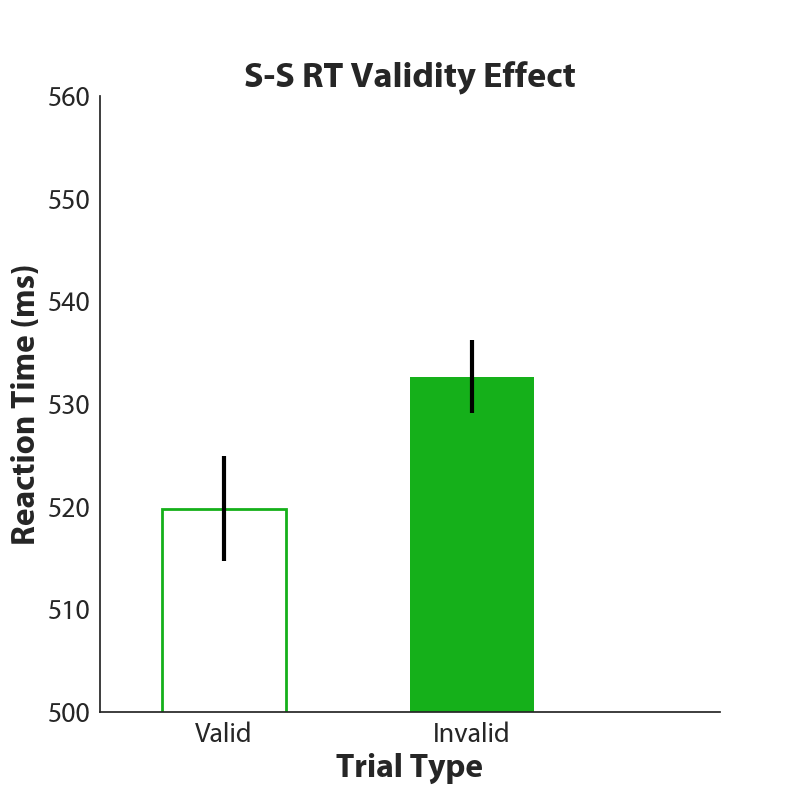

In [141]:
barwidth = 0.5; 
fig, ax = plt.subplots(figsize=(8, 8));
rects1 = ax.bar(0.5,RTanalysis.Valid.mean(),barwidth,yerr=RTstderror.Valid,ecolor='k',edgecolor=sns.xkcd_rgb['green'],linewidth = 2, facecolor='none',error_kw=dict(lw=3));
rects2 = ax.bar(1.5,RTanalysis.Invalid.mean(),barwidth,color=sns.xkcd_rgb['green'],yerr=RTstderror.Invalid,ecolor='k',error_kw=dict(lw=3));
sns.set(context='notebook', style='white', font='Myriad Pro', font_scale=2, color_codes=False, rc=None);
ax.set_ylim(500,560)
ax.set_xlim(0,2.5);
ax.set_xticklabels(('Valid', 'Invalid'));
ax.set_xticks([0.5, 1.5]);
ax.set_yticks(np.arange(500, 561, 10));
plt.title('S-S RT Validity Effect', fontsize=26,fontweight="bold")
plt.ylabel('Reaction Time (ms)', fontsize=24,fontweight="bold")
plt.xlabel('Trial Type', fontsize=24,fontweight="bold")
sns.despine();

plt.show()

<IPython.core.display.Javascript object>


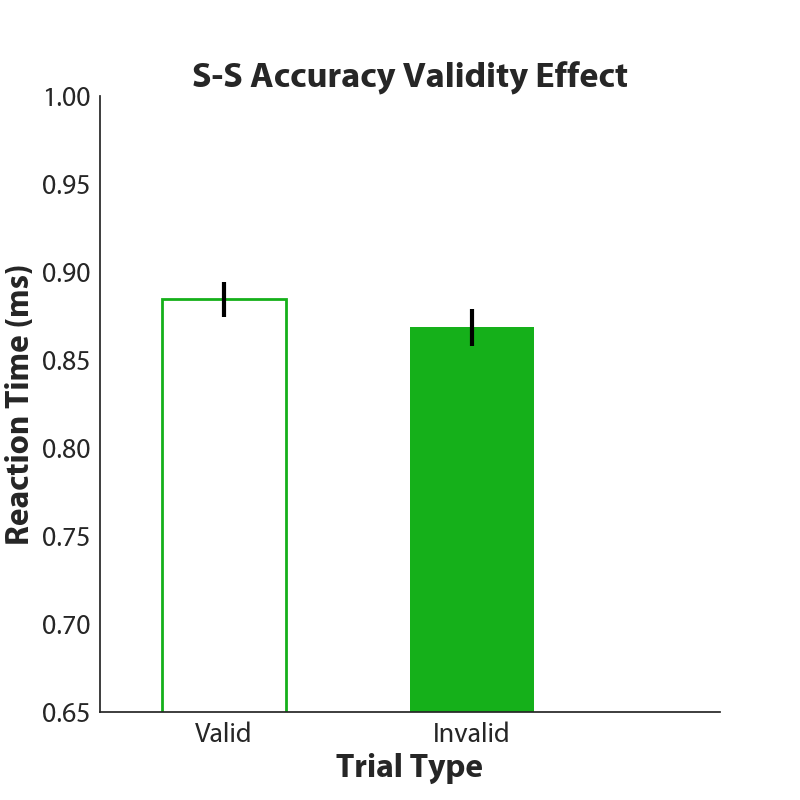

In [142]:
barwidth = 0.5; # previously have used x tick marks as x + barwidth/2, but newer anaconda doesn't need it
fig, ax = plt.subplots(figsize=(8, 8));
rects1 = ax.bar(0.5,ACCanalysis.Valid.mean(),barwidth,yerr=ACCstderror.Valid,ecolor='k',edgecolor=sns.xkcd_rgb['green'],linewidth = 2, facecolor='none',error_kw=dict(lw=3));
rects2 = ax.bar(1.5,ACCanalysis.Invalid.mean(),barwidth,color=sns.xkcd_rgb['green'],yerr=ACCstderror.Invalid,ecolor='k',error_kw=dict(lw=3));
sns.set(context='notebook', style='white', font='Myriad Pro', font_scale=2, color_codes=False, rc=None);
ax.set_ylim(0.65,1.00);
ax.set_xlim(0,2.5);
ax.set_xticklabels(('Valid', 'Invalid'));
ax.set_xticks([0.5, 1.5]);
ax.set_yticks(np.arange(0.65, 1.01, 0.05));
plt.title('S-S Accuracy Validity Effect', fontsize=26,fontweight="bold")
plt.ylabel('Reaction Time (ms)', fontsize=24,fontweight="bold")
plt.xlabel('Trial Type', fontsize=24,fontweight="bold")
sns.despine();

plt.show()

# Post-test Questionnaire Validation of S-S Phase

We chose to adapt the S-S Phase so that we would have objective measures (validity effects) that indicated whether a subject had learned the stimuli associations. To validate these measures, we tested whether they were correlated with performance on the post-test Explicit Memory questions.

In [91]:
%cd ..

C:\Users\cb383\Desktop\YearTwo\controlwork\SCP_R\data


In [92]:
posttest = pd.read_csv('posttest.csv')

In [93]:
RTValidityEffect = RTanalysis.Invalid - RTanalysis.Valid;
ACCValidityEffect = ACCanalysis.Invalid - ACCanalysis.Valid;

<IPython.core.display.Javascript object>


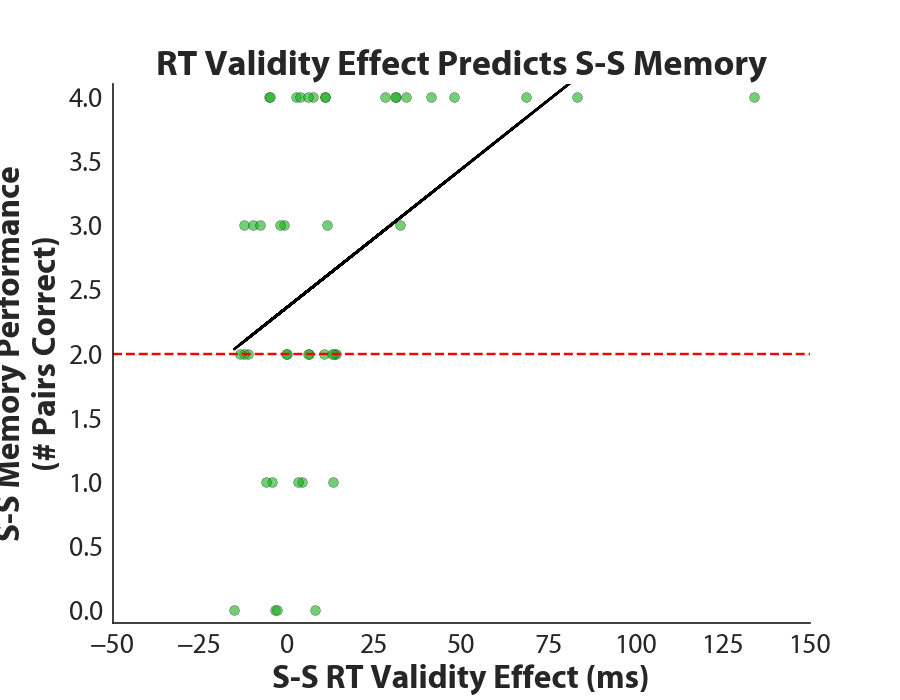

LinregressResult(slope=0.021539891234642092, intercept=2.3588822935000198, rvalue=0.44825670247381211, pvalue=0.0022769381188570232, stderr=0.0066280133641460157)

In [94]:
from pylab import polyfit, poly1d
fig, ax = plt.subplots(figsize=(9, 7));
plt.scatter(RTValidityEffect, posttest.ExplicitMem, s=50,c=sns.xkcd_rgb['green'],alpha=0.6,edgecolors='k');
sns.set(context='notebook', style='white', font='Myriad Pro', font_scale=2, color_codes=False, rc=None);
fit = polyfit(RTValidityEffect, posttest.ExplicitMem, 1);
fit_fn = poly1d(fit);
plt.plot(RTValidityEffect, fit_fn(RTValidityEffect), 'k');
plt.plot([-50,0,50,100,150],[2,2,2,2,2], 'r--');
ax.set_ylim(-0.1,4.1);
ax.set_xlim(-50,150);
plt.title('RT Validity Effect Predicts S-S Memory', fontsize=26,fontweight="bold");
plt.ylabel('S-S Memory Performance\n(# Pairs Correct)', fontsize=24,fontweight="bold");
plt.xlabel('S-S RT Validity Effect (ms)', fontsize=24,fontweight="bold");
sns.despine();

plt.show()
stats.linregress(RTValidityEffect,posttest.ExplicitMem) #see stats below graph

<IPython.core.display.Javascript object>


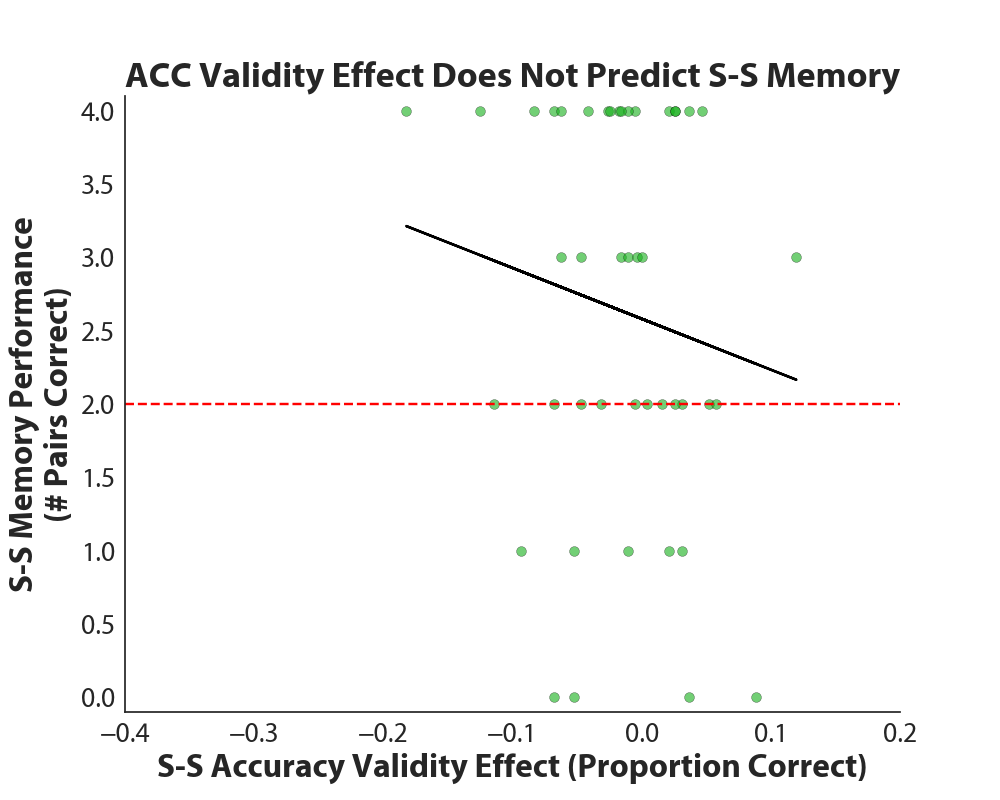

LinregressResult(slope=-3.4696494752496414, intercept=2.5809069999467305, rvalue=-0.14745788284722239, pvalue=0.33947572884257171, stderr=3.5910318837213784)

In [159]:
from pylab import polyfit, poly1d
fig, ax = plt.subplots(figsize=(10, 8));
plt.scatter(ACCValidityEffect, posttest.ExplicitMem, s=50,c=sns.xkcd_rgb['green'],alpha=0.6,edgecolors='k');
sns.set(context='notebook', style='white', font='Myriad Pro', font_scale=2, color_codes=False, rc=None);
fit = polyfit(ACCValidityEffect, posttest.ExplicitMem, 1);
fit_fn = poly1d(fit);
plt.plot(ACCValidityEffect, fit_fn(ACCValidityEffect), 'k');
plt.plot([-0.4,-0.3,-0.2,-0.1,0,0.1,0.2],[2,2,2,2,2,2,2], 'r--');
ax.set_ylim(-0.1,4.1);
ax.set_xlim(-0.4,0.2);
plt.title('ACC Validity Effect Does Not Predict S-S Memory', fontsize=26,fontweight="bold");
plt.ylabel('S-S Memory Performance\n(# Pairs Correct)', fontsize=24,fontweight="bold");
plt.xlabel('S-S Accuracy Validity Effect (Proportion Correct)', fontsize=24,fontweight="bold");
sns.despine();

plt.show()
stats.linregress(ACCValidityEffect,posttest.ExplicitMem) #see stats below graph

#### Memory performance was correlated with the S-S validity effects for RT but not accuracy. Participants who learned the initial S-S associations, as shown by larger validity effects, had greater subsequent memory of the S1-S2 pairs.

#### We also checked to make sure that people could explicitly match the pairs above chance (i.e., 2/4 pairs correct). The chance line was indicated on the above graphs as a red dotted line.

In [96]:
stats.ttest_1samp(posttest.ExplicitMem,2)

Ttest_1sampResult(statistic=3.1304951684997047, pvalue=0.0031334643041826139)

# Explicit Understanding of the Task Structure (More Post-Test Analysis)

#### After establishing that participants could correctly remember the associative pairs, we assessed their explicit understanding of the S-S task structure through a series of post-test questions. This data is summarized in the posttest dataframe/csv file (`posttest.Q1_SS_SystematicVariation`, `posttest.Q2`, `posttest.Q3`, `posttest.Q4`, `posttest.ExplicitTaskAwareness`). I created pie charts in Matlab simply based off the numbers. For a simple example, see below.

<IPython.core.display.Javascript object>


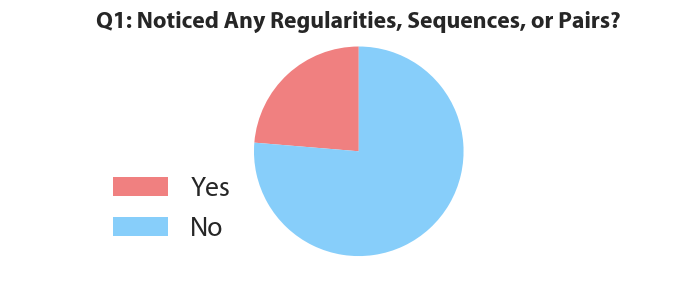

In [97]:
fig, ax = plt.subplots(figsize=(7, 3));
Q1 = [18, 58];
labels = ['Yes','No']
colors = ['lightcoral', 'lightskyblue'];
patches, texts = plt.pie(Q1, colors=colors, startangle=90)
plt.legend(patches, labels, loc='lower left')
plt.title('Q1: Noticed Any Regularities, Sequences, or Pairs?', fontsize=17,fontweight="bold");
plt.axis('equal');
plt.show()

#### Only XX out of YY participants reported noticing the underlying task structure and answered all follow-up questions correctly, indicating that the vast majority of participants had limited explicit awareness of the S-S phase structure.

#### We assessed explicit awareness of the underlying S-C and S-CT task structures by asking participants whether they noticed any systematic variation in the image/Stroop trial sequences. These I also plotted with pie charts in Matlab. You can also find the data in posttest (`posttest.Q1_SC_SystematicVariation`, `posttest.Q1_SCT_SystematicVariation`). Only XX out of YY participants exhibited any explicit understanding of the S-C phase structure. Removing these subjects from the main analyses did not alter any of the results.

#### Next, we asked participants to rate how likely perceptual image categories predicted the frequency of easy/congruent and hard/incongruent trials on a scale from 0 (never) to 100 (always). 

For scenes, the categories included sky presence (present vs. absent; mountain/canyon vs. waterfall/forest), color scheme (pale vs. bright; mountain/waterfall vs. canyon/forest), and tree frequency (present vs. absent; mountain/forest vs. canyon/waterfall). 

For faces and houses, they were image type (faces vs. houses), feature type (light eyes and porch stairs together vs. dark eyes and no porch stairs together), or light type (lighter hair and lighter house together vs. darker hair and darker house together)

In [98]:
stats.ttest_1samp(posttest.Q2_SceneSkyPresence,50)

Ttest_1sampResult(statistic=-2.5860582073086724, pvalue=0.013178580452977904)

In [99]:
stats.ttest_1samp(posttest.Q2_SceneColorScheme,50)

Ttest_1sampResult(statistic=1.7227216109189587, pvalue=0.092124776700313452)

In [100]:
stats.ttest_1samp(posttest.Q2_SceneTreeFrequency,50)

Ttest_1sampResult(statistic=0.10644049400311417, pvalue=0.91572790637305068)

Participants rated all perceptual scene categories as non-predictive (i.e., 50% frequency).

In [101]:
stats.ttest_rel(posttest.Q2_SceneSkyPresence, posttest.Q2_SceneColorScheme)

Ttest_relResult(statistic=-2.7006281260989944, pvalue=0.0098594818854982284)

In [102]:
stats.ttest_rel(posttest.Q2_SceneSkyPresence, posttest.Q2_SceneTreeFrequency)

Ttest_relResult(statistic=-1.526764725784739, pvalue=0.13414234990341595)

In [103]:
stats.ttest_rel(posttest.Q2_SceneColorScheme, posttest.Q2_SceneTreeFrequency)

Ttest_relResult(statistic=0.78658012138045119, pvalue=0.43584142014914928)

Participants' ratings for each scene category did not differ. Participants were unable to differentiate between the actual predictor category and lures. This suggests that participants remained unaware of how S2 control-demand cues were determined.

In [104]:
stats.ttest_rel(posttest.Q2_ImageType, posttest.Q2_FeatureType)

Ttest_relResult(statistic=0.35616110311206256, pvalue=0.7234615138108107)

In [105]:
stats.ttest_rel(posttest.Q2_ImageType, posttest.Q2_LightType)

Ttest_relResult(statistic=0.35030516874090639, pvalue=0.72781991061056894)

In [106]:
stats.ttest_rel(posttest.Q2_FeatureType, posttest.Q2_LightType)

Ttest_relResult(statistic=-0.012873396999344656, pvalue=0.98978834322579323)

Image type was further rated as significantly more likely than feature type and light type. Since the S-CT phase was non-predictive, none of these categories should have been rated more likely than the other.

See graph below.

In [107]:
SkyPresence = posttest.groupby(['subjID'])['Q2_SceneSkyPresence'].mean()
SkyPresenceSEM = pd.Series.std(SkyPresence) / n
ColorScheme = posttest.groupby(['subjID'])['Q2_SceneColorScheme'].mean()
ColorSchemeSEM = pd.Series.std(ColorScheme) / n
TreeFreq = posttest.groupby(['subjID'])['Q2_SceneTreeFrequency'].mean()
TreeFreqSEM = pd.Series.std(TreeFreq) / n

ImageType = posttest.groupby(['subjID'])['Q2_ImageType'].mean()
ImageTypeSEM = pd.Series.std(ImageType) / n
FeatureType = posttest.groupby(['subjID'])['Q2_FeatureType'].mean()
FeatureTypeSEM = pd.Series.std(FeatureType) / n
LightType = posttest.groupby(['subjID'])['Q2_LightType'].mean()
LightTypeSEM = pd.Series.std(LightType) / n

<IPython.core.display.Javascript object>


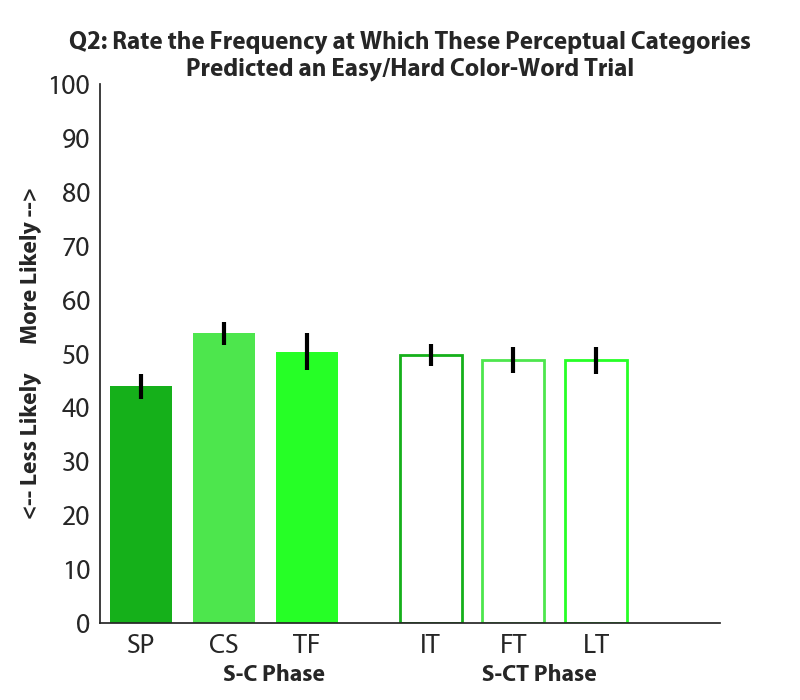

In [158]:
barwidth = 0.75; 
fig, ax = plt.subplots(figsize=(8, 7));
rects1 = ax.bar(0.5,SkyPresence.mean(),barwidth,color=sns.xkcd_rgb['green'],yerr=SkyPresenceSEM,ecolor='k',error_kw=dict(lw=3));
rects2 = ax.bar(1.5,ColorScheme.mean(),barwidth,color=(0.3,0.9,0.3),yerr=ColorSchemeSEM,ecolor='k',error_kw=dict(lw=3));
rects3 = ax.bar(2.5,TreeFreq.mean(),barwidth,color=(0.15,1,0.15),yerr=TreeFreqSEM,ecolor='k',error_kw=dict(lw=3));
rects4 = ax.bar(4,ImageType.mean(),barwidth,yerr=ImageTypeSEM,ecolor='k',edgecolor=sns.xkcd_rgb['green'],linewidth = 2,facecolor='none', error_kw=dict(lw=3));
rects5 = ax.bar(5,FeatureType.mean(),barwidth,yerr=FeatureTypeSEM,ecolor='k',edgecolor=(0.3,0.9,0.3),linewidth = 2,facecolor='none', error_kw=dict(lw=3));
rects6 = ax.bar(6,LightType.mean(),barwidth,yerr=LightTypeSEM,ecolor='k',edgecolor=(0.15,1,0.15),linewidth = 2, facecolor='none',error_kw=dict(lw=3));
sns.set(context='notebook', style='white', font='Myriad Pro', font_scale=2, color_codes=False, rc=None);
ax.set_ylim(0,100);
ax.set_xlim(0,7.5);
ax.set_xticklabels(('SP','CS','TF','IT','FT','LT'));
ax.set_xticks([0.5, 1.5, 2.5, 4, 5, 6]);
ax.set_yticks(np.arange(0, 101, 10));
plt.title('Q2: Rate the Frequency at Which These Perceptual Categories\nPredicted an Easy/Hard Color-Word Trial', fontsize=18,fontweight="bold")
plt.ylabel('<-- Less Likely      More Likely -->', fontsize=17,fontweight="bold")
plt.xlabel('S-C Phase                                 S-CT Phase', fontsize=17,fontweight="bold")
sns.despine();

plt.show()

#### Participants were then asked to match S1 and S2 images to the Stroop trial type that they most likely preceded. Did they perform better than chance (i.e., 2/4 cue-demand relationships correctly matched)?

In [109]:
stats.ttest_1samp(posttest.Q3_SC_ForcedChoicePerformance,2)

Ttest_1sampResult(statistic=-0.40064237096839878, pvalue=0.69066720715752328)

In [110]:
stats.ttest_1samp(posttest.Q3_SCT_ForcedChoicePerformance,2)

Ttest_1sampResult(statistic=-1.6655910507645917, pvalue=0.10306508148945003)

In [111]:
stats.ttest_rel(posttest.Q3_SC_ForcedChoicePerformance, posttest.Q3_SCT_ForcedChoicePerformance)

Ttest_relResult(statistic=1.0000000000000002, pvalue=0.32290489167960745)

<IPython.core.display.Javascript object>


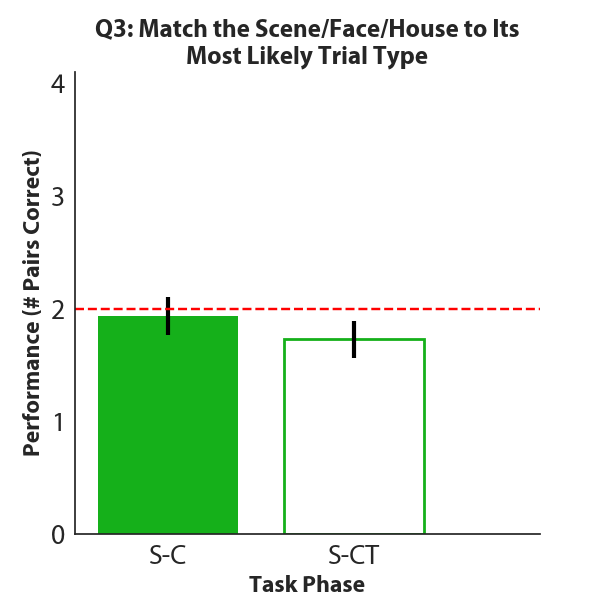

In [157]:
SCFC = posttest.groupby(['subjID'])['Q3_SC_ForcedChoicePerformance'].mean()
SCFCSEM = pd.Series.std(SCFC) / n
SCTFC = posttest.groupby(['subjID'])['Q3_SCT_ForcedChoicePerformance'].mean()
SCTFCSEM = pd.Series.std(SCTFC) / n

barwidth = 0.75; 
fig, ax = plt.subplots(figsize=(6, 6));
rects1 = ax.bar(0.5,SCFC.mean(),barwidth,color=sns.xkcd_rgb['green'],yerr=SCFCSEM,ecolor='k',error_kw=dict(lw=3));
rects4 = ax.bar(1.5,SCTFC.mean(),barwidth,yerr=SCTFCSEM,ecolor='k',edgecolor=sns.xkcd_rgb['green'],linewidth = 2,facecolor='none', error_kw=dict(lw=3));
sns.set(context='notebook', style='white', font='Myriad Pro', font_scale=2, color_codes=False, rc=None);
ax.set_ylim(0,4.1);
ax.set_xlim(0,2.5);
plt.plot([0,1,2,2.5],[2,2,2,2], 'r--');
ax.set_xticklabels(('S-C','S-CT'));
ax.set_xticks([0.5, 1.5]);
ax.set_yticks(np.arange(0, 5, 1));
plt.title('Q3: Match the Scene/Face/House to Its\nMost Likely Trial Type', fontsize=18,fontweight="bold")
plt.ylabel('Performance (# Pairs Correct)', fontsize=17,fontweight="bold")
plt.xlabel('Task Phase', fontsize=17,fontweight="bold")
sns.despine();

plt.show()

Participants performed at chance when matching S2 control-demand cues to their actual Stroop trial congruency and did not match S2 control-demand cues more accurately than non-predictive S1 transfer probes. Taken together, these measures suggest that most participants remained unaware of the task structure and learned these associations implicitly.

In sum, participants were able to correctly remember the S1-S2 associative pairs, and their memory performance was correlated with S-S validity effects. However, participants seemed unaware of the task structure and learned the associations implicitly.

# Making 95% Confidence Intervals

Now I'm making the Supplementary tables that show our data in full, with 95% CIs accompanying the means.

In [113]:
import statsmodels.stats.api as sms

#ValidRTCI
a = RTanalysis.Valid.mean()
sms.DescrStatsW(RTanalysis.Valid).tconfint_mean()

(509.47525496323755, 530.11293006152096)

In [114]:
#InvalidRTCI
a = RTanalysis.Invalid.mean()
sms.DescrStatsW(RTanalysis.Invalid).tconfint_mean()

(525.45332298831079, 539.89927652126642)

In [115]:
a = RTrunanalysis.loc[RTrunanalysis['Run'] == 0].Valid.mean()
sms.DescrStatsW(RTrunanalysis.loc[RTrunanalysis['Run'] == 0].Valid).tconfint_mean()

(535.38859385887258, 553.01868994236997)

In [116]:
a = RTrunanalysis.loc[RTrunanalysis['Run'] == 0].Invalid.mean()
sms.DescrStatsW(RTrunanalysis.loc[RTrunanalysis['Run'] == 0].Invalid).tconfint_mean()

(531.26184645188755, 552.66445060963679)

In [117]:
a = RTrunanalysis.loc[RTrunanalysis['Run'] == 1].Valid.mean()
sms.DescrStatsW(RTrunanalysis.loc[RTrunanalysis['Run'] == 1].Valid).tconfint_mean()

(517.74644704161005, 535.2253513651267)

In [118]:
a = RTrunanalysis.loc[RTrunanalysis['Run'] == 1].Invalid.mean()
sms.DescrStatsW(RTrunanalysis.loc[RTrunanalysis['Run'] == 1].Invalid).tconfint_mean()

(523.97968283479361, 541.81779191268117)

In [119]:
a = RTrunanalysis.loc[RTrunanalysis['Run'] == 2].Valid.mean()
sms.DescrStatsW(RTrunanalysis.loc[RTrunanalysis['Run'] == 2].Valid).tconfint_mean()

(496.56366427356625, 524.95849278458411)

In [120]:
a = RTrunanalysis.loc[RTrunanalysis['Run'] == 2].Invalid.mean()
sms.DescrStatsW(RTrunanalysis.loc[RTrunanalysis['Run'] == 2].Invalid).tconfint_mean()

(514.44763579807989, 535.98973793929383)

In [121]:
a = RTrunanalysis.loc[RTrunanalysis['Run'] == 3].Valid.mean()
sms.DescrStatsW(RTrunanalysis.loc[RTrunanalysis['Run'] == 3].Valid).tconfint_mean()

(488.49318133851773, 520.52181238961612)

In [122]:
a = RTrunanalysis.loc[RTrunanalysis['Run'] == 3].Invalid.mean()
sms.DescrStatsW(RTrunanalysis.loc[RTrunanalysis['Run'] == 3].Invalid).tconfint_mean()

(519.79823471705913, 539.56385205980041)

And for accuracy...

In [123]:
#ValidACCCI
a = ACCanalysis.Valid.mean()
sms.DescrStatsW(ACCanalysis.Valid).tconfint_mean()

(0.86456013858297054, 0.90465146772096039)

In [124]:
#InvalidACCCI
a = ACCanalysis.Invalid.mean()
sms.DescrStatsW(ACCanalysis.Invalid).tconfint_mean()

(0.84731694636208188, 0.88992795159710181)

In [125]:
a = ACCrunanalysis.loc[ACCrunanalysis['Run'] == 0].Valid.mean()
sms.DescrStatsW(ACCrunanalysis.loc[ACCrunanalysis['Run'] == 0].Valid).tconfint_mean()

(0.70636357699163632, 0.79450279953963387)

In [126]:
a = ACCrunanalysis.loc[ACCrunanalysis['Run'] == 0].Invalid.mean()
sms.DescrStatsW(ACCrunanalysis.loc[ACCrunanalysis['Run'] == 0].Invalid).tconfint_mean()

(0.64654954533440145, 0.76953437074951458)

In [127]:
a = ACCrunanalysis.loc[ACCrunanalysis['Run'] == 1].Valid.mean()
sms.DescrStatsW(ACCrunanalysis.loc[ACCrunanalysis['Run'] == 1].Valid).tconfint_mean()

(0.86518361376381903, 0.93121790138769589)

In [128]:
a = ACCrunanalysis.loc[ACCrunanalysis['Run'] == 1].Invalid.mean()
sms.DescrStatsW(ACCrunanalysis.loc[ACCrunanalysis['Run'] == 1].Invalid).tconfint_mean()

(0.86025897432629872, 0.93577832171099717)

In [129]:
a = ACCrunanalysis.loc[ACCrunanalysis['Run'] == 2].Valid.mean()
sms.DescrStatsW(ACCrunanalysis.loc[ACCrunanalysis['Run'] == 2].Valid).tconfint_mean()

(0.92285796953970956, 0.96350566682392691)

In [130]:
a = ACCrunanalysis.loc[ACCrunanalysis['Run'] == 2].Invalid.mean()
sms.DescrStatsW(ACCrunanalysis.loc[ACCrunanalysis['Run'] == 2].Invalid).tconfint_mean()

(0.90384563682179642, 0.95221496923880933)

In [131]:
a = ACCrunanalysis.loc[ACCrunanalysis['Run'] == 3].Valid.mean()
sms.DescrStatsW(ACCrunanalysis.loc[ACCrunanalysis['Run'] == 3].Valid).tconfint_mean()

(0.9280177714040756, 0.96528386743327754)

In [132]:
a = ACCrunanalysis.loc[ACCrunanalysis['Run'] == 3].Invalid.mean()
sms.DescrStatsW(ACCrunanalysis.loc[ACCrunanalysis['Run'] == 3].Invalid).tconfint_mean()

(0.91532395052421012, 0.96725180705154745)